# An analysis of the COVID-19's effect on the pollution level in India

![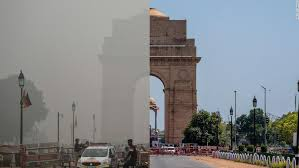](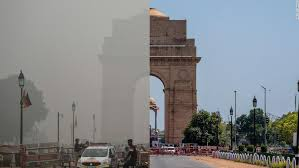) The air around india Gate in Delhi ,before and after Lockdown Source:[https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSPvBnwCJVPGWqSDer_LzlyS0C8gYI5XEimxA&usqp=CAU](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSPvBnwCJVPGWqSDer_LzlyS0C8gYI5XEimxA&usqp=CAU)


A nationwide lockdown imposed areoss India on 24 March to stop the spread of coronavirus. Especially among the country 300 million poor.Yet in Delhi, the world's most polluted city, it has also resulted in some of the freshest air the captial has seen in deades.

![https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQABDfTfhEK4PF7oICXtEKzvq6nyxMdw1nyNw&usqp=CAU](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQABDfTfhEK4PF7oICXtEKzvq6nyxMdw1nyNw&usqp=CAU)

# Objective

Here we have access to a large amount of granular data to relating to the concentration of major air polluntants in india and it will be interseting to see if the claim of reduced air pollution is being actually backed by data

**Types of Air pollutants**

First try and understand the various types of air pollutants in the datasets. 
![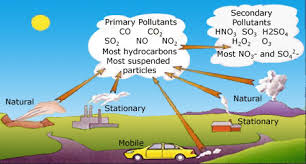](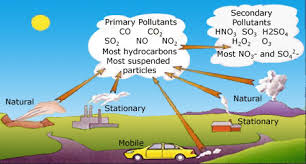)

*** Primary Pollutants:** A primary pollutant is an air pollutant emitted directly from a source. 
Example: Carbon Monoxide, Carbon Dioxide, Sulphur Dioxide , Most hydrocarbons and Most suspended particles.

* **Secondary Pollutant:** A secondary pollutant is not directly emitted as such, but forms when other pollutanrs react in the atmosphere.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries


In [ ]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
from plotly.subplots import make_subplots

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
!pip install chart_studio
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#py.init_notebook_mode(connected=True)
# color pallette
cnf, dth, rec, act,wth,sth = '#393e46', '#ff2e63', '#21bf73', '#fe9801','#456fe3','#78ffee' 
#Geographical Plotting
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() 

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
#Racing Bar Chart
!pip install bar_chart_race
import bar_chart_race as bcr
from IPython.display import display_html
# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs


# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path='/kaggle/input/air-quality-data-in-india/'
station_hour=pd.read_csv(path+'station_hour.csv')
station_day=pd.read_csv(path+'station_day.csv')
stations=pd.read_csv(path+'stations.csv')
city_day=pd.read_csv(path+'city_day.csv')
city_hour=pd.read_csv(path+'city_hour.csv')
city=pd.read_csv('/kaggle/input/indian-cities-database/Indian Cities Database.csv')

1. # Analysis at City level- daily data
 
We have daily and hourly city data as well as daily and hourly Satation data. Station refers to the continuous pollution monitoring stations operated and maintained by the Central Pollution Control Board(CPCB) and the State Pollution Control Boards.Let's begin by analyzing the various cities dialy data to get a big picture. We shall begin by importing the dataset and the necessary libraries for the analysis

In [ ]:
display("City In India")
display(city.head())
display(city.shape)

In [ ]:
display("City Day in india")
display(city_day.head())
display(city_day.shape)

# Features Description 

1. **PM2.5**: It refers to particles that have diameter less than 2.5 micrometers(more than 100 times thinner than human air) and remain suspended for longer. These particles are formed as a result of burning fuel and chemical reactions that take place in the atmosphere.


2.**PM10**: PM10 are the particles with a diameter of 10 micrometers and they are also called fine particles. An environmental expert says that PM10 is also known as respirable particulate mattter.Particulate matter is a complex mixture of soot,smoke,metals,nitrates,sulphates,dust water and rubber etc



**3. NO**: Nitric oxide is not considered to be hazardous to health at typical ambient concentrations, but nitrogen dioxide can be. ... NOx gases react to form smong and acid rain as well as being central to the formation of fine particles(PM) and ground level ozone.



**4.NO2**: Nitrogen dioxide is part of a group of gaseous air pollutants produced as a result of road traffic and other fossil fuel combustion processes. Its presence in air pollutants.



**4.NH3**: Gaseous ammonia (NH3) is the most abundant alkaline gas in the atmosphere. NH3 plays a significant role int he formation of atmospheric particulate matter,visibility degradation and atmospheric deposition of nitrogen to sensitive ecosystem.



**4.CO**: It is produced in the incomplete combustion of carbon-containing fuels such as gasoline,natural gas,oil,coal and wood.



**5.SO2**: It is formed when fuel containing sulphur such as coal and oil, is burned,creating air pollution. It affect the environment when they react with substances in the atmosphere to form acid rain.



**6.O3**: It is harmful to air quality outside of the ozone layer.Ground level ozone is a colorless and highly irritating gas that forms just above the earth's surface.



**7.Benzene**:The benzene in indoor comes from product that contain benzene such as glues,paints , furniture wax , and detergents.The air around hazardous waste sites or gas stations can contain higher level of benzene than in other areas.



**8.Toluene**: Motor vehicle and industrial emmissions are the major sources of pollutants .


**9.Xylene**: Motor vechicle emissions are the predominant source of xylene in the urban air environment. Evaporation from petroleum fuel storage facilities and service stations.



**10.AQI**: The air quality index is an index for reporting air quality on a daily basis. It is a measure of how air pollution affects one's health with in short time period. The purpose of the AQI is to help kow how the local air quality impacts their health.



**11. AQI_Bucket:** it is variable of AQI.

In [ ]:
display(city_day.info())

In [ ]:
#determined ht emissing data
def Missing (X):
    total = X.isnull().sum().sort_values(ascending = False)
    percent = round(X.isnull().sum().sort_values(ascending = False)/len(X)*100, 2)
    missing = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return(missing) 
#plots number of dataframes side by side
def SideSide(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw = True)


In [ ]:
# Fill empty values with NaN
city_day = city_day.fillna(np.nan)
#finds missing values
missing_city_day = Missing(city_day)
print('CITY DAY DATA')
SideSide(missing_city_day)
print('\n\n  MISSING  DATA ')
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
plt.figure(figsize = (20,8));
sns.heatmap(city_day.isnull(), yticklabels = False, cbar = False, cmap = cmap)

# Cities in the dataset


In [ ]:
cities=city_day['City'].value_counts()
print('total number of cities in the dataset:',len(cities))
print(cities.index)


# Convert to Date Time format

Let's convert the Date column into Date Time format with the help of datetime library

In [ ]:
# Convert string to datetime 64
city_day['Date']=pd.to_datetime(city_day['Date'])


In [ ]:
print(f"The available data is between {city_day['Date'].min()} and {city_day['Date'].max()}")

# Analysing the Complete City Level Daily Data

Let's now analyse the work with the data to see what patterns and insights 

In [ ]:
# combining the PM2.5 and PM10 into one column 
city_day['Particulate_Matter']=city_day['PM2.5']+city_day['PM10']

In [ ]:
# Combining the Benezene ,Toulene and Xylene levels into one column
city_day['poisionus']=city_day['Benzene']+city_day['Toluene']+city_day['Xylene']
city_day.drop(['Benzene','Toluene','Xylene'],axis=1)

In [ ]:
city_day['AQI_Bucket'].value_counts()

In [ ]:
sns.countplot(city_day['AQI_Bucket'])

In [ ]:
primary_pollutants=['PM2.5','PM10','NO2','NOx','CO','SO2']
secondary_pollutants=['poisionus','O3']

**Visulising yearly data**

In [ ]:
city_day.set_index('Date',inplace=True)
axes = city_day[primary_pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

In [ ]:
temp=city_day.groupby('Date')['PM2.5','PM10','NO2','NOx','CO','SO2'].sum().reset_index()
temp=temp.melt(id_vars="Date",value_vars=['PM2.5','PM10','NO2','NOx','CO','SO2'],var_name='Pollutants',value_name='Count')
temp.head()
fig=px.area(temp,x='Date',y='Count',color='Pollutants',height=600,title='Primary Pollutant over time',color_discrete_sequence=[cnf, dth, rec, act,wth,sth])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
temp=city_day.groupby('Date')['poisionus','O3'].sum().reset_index()
temp=temp.melt(id_vars="Date",value_vars=['poisionus','O3'],var_name='Pollutants',value_name='Count')
temp.head()
fig=px.area(temp,x='Date',y='Count',color='Pollutants',height=600,title='Secondary Pollutant over time',color_discrete_sequence=[cnf, dth])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

In [ ]:
city_day.reset_index(inplace=True)
df = city_day.copy()
value='NO2'
trend_plot(df,value)

In [ ]:
city_day.reset_index(inplace=True)
df = city_day.copy()
value='PM10'
trend_plot(df,value)

In [ ]:
city_day.reset_index(inplace=True)
df = city_day.copy()
value='poisionus'
trend_plot(df,value)

In [ ]:
def max_polluted_city(pollutant):
    x1 = city_day[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [ ]:
#source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
posinious = max_polluted_city('poisionus')


display_side_by_side(pm2_5,pm10,no2,so2,co,posinious)

In [ ]:
full_grouped=city_day.groupby(['Date','City',])['PM2.5','PM10','NO2','NOx','CO','SO2','poisionus','O3','AQI'].sum().reset_index()


In [ ]:
day_wise=full_grouped.groupby('Date')['NO2','AQI'].sum().reset_index()
day_wise['No.of city']=full_grouped[full_grouped['NO2']!=0].groupby('Date')['City'].unique().apply(len).values
day_wise['No.of City']=full_grouped[full_grouped['AQI']!=0].groupby('Date')['City'].unique().apply(len).values
fig_c=px.line(day_wise,x="Date",y="NO2",color_discrete_sequence=[act])
fig_d=px.line(day_wise,x="Date",y="AQI",color_discrete_sequence=[dth])
fig=make_subplots(rows=1,cols=2,shared_xaxes=False,horizontal_spacing=0.1,subplot_titles=('NO2 Present in Air','AQI'))
fig.add_trace(fig_c['data'][0],row=1,col=1)
fig.add_trace(fig_d['data'][0],row=1,col=2)
fig.update_layout(height=460)
fig.show()


In [ ]:
City_wise=full_grouped[full_grouped['Date']==max(full_grouped['Date'])].reset_index(drop=True).drop('Date',axis=1)
#group by City
City_wise=City_wise.groupby('City')['NO2','AQI'].sum().reset_index()

In [ ]:
fig=px.scatter(City_wise.sort_values('AQI',ascending=False).iloc[:15,:],x="AQI",y='NO2',color='City',size='AQI',height=700,text='City',log_x=True,log_y=True,title="NO2 Vs AQI (Scale is in log10)")
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
City_wise=full_grouped[full_grouped['Date']==max(full_grouped['Date'])].reset_index(drop=True).drop('Date',axis=1)
#group by City
City_wise=City_wise.groupby('City')['AQI','poisionus'].sum().reset_index()

In [ ]:
fig=px.scatter(City_wise.sort_values('AQI',ascending=False).iloc[:15,:],x="AQI",y='poisionus',color='City',size='AQI',height=700,text='City',log_x=True,log_y=True,title="Poisionus Vs AQI (Scale is in log10)")
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

# AQI for some of the major cities of India

In [ ]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = city_day[city_day['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

In [ ]:
fig=px.line(full_grouped,x='Date',y='AQI',color='City',height=600,title='AQI',color_discrete_sequence=px.colors.cyclical.mygbm)
fig.show()


In [ ]:
full_latest=city_day[city_day['Date']==max(city_day['Date'])]
fig=px.treemap(full_latest.sort_values(by='AQI',ascending=False).reset_index(drop=True),path=["City"],values='AQI',height=700,title="AOI of City",color_discrete_sequence=px.colors.qualitative.Dark2)
fig.data[0].textinfo='label+text+value'
fig.show()




# AQI in 2020

Let plot a racing car chart to see overall AQI in 2020 .Please refer to [https://github.com/dexplo/bar_chart_race](https://github.com/dexplo/bar_chart_race)for the code

In [ ]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)
#Source code for racing barchart: https://github.com/dexplo/bar_chart_race
AQI_2020 = AQI_pivot[AQI_pivot.index > '2019-12-31']
bcr_html = bcr.bar_chart_race(df=AQI_2020, filename=None, period_length=300,orientation='v',figsize=(8, 6),bar_label_size=7,tick_label_size=7,title='AQI levels in 2020')
display_html(bcr_html)


# **AQI before and after lockdown**

In [ ]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']

In [ ]:
print(AQI_beforeLockdown.mean())
print(AQI_afterLockdown.mean())

In [ ]:
# Helper functions

#source: http://nicolasfauchereau.github.io/climatecode/posts/drawing-a-gauge-with-matplotlib/
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

In [ ]:
#source: http://nicolasfauchereau.github.io/climatecode/posts/drawing-a-gauge-with-matplotlib/
from matplotlib.patches import Circle, Wedge, Rectangle
def gauge(labels=['GOOD','SATISFACTORY','MODERATE','POOR','VERY POOR','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False): 
    
    """
    some sanity checks first
    

"""
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors 
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)


In [ ]:
display("Ahmedabad's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], 
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=5, title='Ahmedabad AQI before Lockdown') 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], 
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title='Ahmedabad AQI After Lockdown') 

In [ ]:
display("Delhi's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], 
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=5, title='Delhi AQI before Lockdown') 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], 
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title='Delhi AQI After Lockdown') 

In [ ]:
display("Patna's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], 
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=5, title='Patna AQI before Lockdown') 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], 
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title='Patna AQI After Lockdown') 

In [ ]:
display("Chennai's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], 
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=5, title='Chennai AQI before Lockdown') 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], 
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title='Chennai AQI After Lockdown') 

# Comparison Between pollution levels in 2020,2019 VS 2018

In [ ]:
#city_day.set_index('Date',inplace=True)
start_date1='2018-01-01'
end_date1='2018-05-01'

mask1 = (city_day['Date'] >= start_date1) & (city_day['Date']  <= end_date1)
pollutants_filtered_2018= city_day.loc[mask1]
pollutants_filtered_2018.fillna(method='bfill',inplace=True)
pollutants_filtered_2018.set_index('Date',inplace=True);

start_date2 = '2019-01-01'
end_date2 = '2019-05-01'

mask2 = (city_day['Date'] >= start_date2) & (city_day['Date']  <= end_date2)
pollutants_filtered_2019 = city_day.loc[mask2]
pollutants_filtered_2019.fillna(method='bfill',inplace=True)
pollutants_filtered_2019.set_index('Date',inplace=True);

start_date3 = '2020-01-01'
end_date3 = '2020-05-01'

mask3 = (city_day['Date'] >= start_date3) & (city_day['Date']  <= end_date3)
pollutants_filtered_2020 = city_day.loc[mask3]
pollutants_filtered_2020.fillna(method='bfill',inplace=True)
pollutants_filtered_2020.set_index('Date',inplace=True);


df1 = pollutants_filtered_2018[pollutants_filtered_2018.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]
df2 = pollutants_filtered_2019[pollutants_filtered_2019.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]
df3 = pollutants_filtered_2020[pollutants_filtered_2020.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]


In [ ]:
def pollution_comparison(city):
    """
    Function to plot graph comparing pollutin levels between (Jan-May)2019 and (Jan-May)2020
    
    """
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2018 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2019 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df3.index, y=df3[df3['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df3.index, y=df3[df3['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df3.index, y=df3[df3['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.add_trace(go.Scatter(x=df3.index, y=df3[df3['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2020 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()

In [ ]:
pollution_comparison('Ahmedabad')

In [ ]:
pollution_comparison('Delhi')

In [ ]:
pollution_comparison('Chennai')

In [ ]:
pollution_comparison('Bengaluru')

# Geographical Analysis Using Dual Maps

In [ ]:
df11 = pollutants_filtered_2019[['City','AQI']]
df22 = pollutants_filtered_2020[['City','AQI']]

df_2019_coord = df11.groupby('City')['AQI'].mean().to_frame().reset_index()
df_2020_coord = df22.groupby('City')['AQI'].mean().to_frame().reset_index()

df_2019_AQI = pd.merge(df_2019_coord,city,on='City')
df_2019_AQI['AQI'] = df_2019_AQI['AQI'].round(0)
df_2020_AQI = pd.merge(df_2020_coord,city,on='City')
df_2020_AQI['AQI'] = df_2020_AQI['AQI'].round(0)

In [ ]:
m = plugins.DualMap(location=(22.9734, 78.6569), tiles=None, zoom_start=5)

folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)


fg_1 = folium.FeatureGroup(name='2019').add_to(m.m1)
fg_2 = folium.FeatureGroup(name='2020').add_to(m.m2)



for lat, lon, value, name in zip(df_2019_AQI['Lat'], df_2019_AQI['Long'], df_2019_AQI['AQI'], df_2019_AQI['City']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        icon=folium.Icon(color='red'),
                        popup = ('<strong>City</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(fg_1)





for lat, lon, value, name in zip(df_2020_AQI['Lat'], df_2020_AQI['Long'], df_2020_AQI['AQI'], df_2020_AQI['City']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        icon=folium.Icon(color='orange'),
                        popup = ('<strong>City</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
                        fill_color='orange',
                        fill_opacity=0.7 ).add_to(fg_2)


folium.LayerControl(collapsed=False).add_to(m)

m


**Please upvote!! stay tuned for further Analysis**